In [ ]:
from visualization import *
from network_graph import *

timestamp = '20240504202421'

save_dir = '/Users/ebenbot/Documents/University/cloud_work/saves/'
save_path = save_dir + timestamp + '/'
file_path = save_path+"cost_GEN_SUM_100/" + "cost_GEN_SUM_100_5_6_20" + ".gml"

#file_path = 'saves/20240504202421/cost_GEN_SUM_100/cost_GEN_SUM_100_5_6_20.gml'
file_path = 'saves/20240506182314_cost/cost_gen_sum_ipd_100/cost_gen_sum_ipd_100_24_6_20.gml'
draw_graph_from_gml(file_path, 'test', node_size=300, edge_width_factor=2.0, figsize=(12, 8))

network=NetworkGraph()
network.load_topology(file_path)

network.calculate_player_server_connections_from_gml()
method_type = 'cost'
network.calculate_delays(method_type=method_type, debug_prints=True)

In [37]:
from visualization import *
from network_graph import *

save_dir = '/Users/ebenbot/Documents/University/cloud_work/'
#active_models = ['ilp_sum', 'ilp_ipd', 'gen_sum', 'gen_ipd']
active_models = ['gen_sum', 'gen_ipd', 'gen_combined']

csv_file_name = "saves/20240506220238_cost/cost_300_20240506220238.csv"
df_results = pd.read_csv(save_dir + csv_file_name, comment='#')

In [38]:
draw_compare_plot(*active_models, df=df_results, x='nr_of_servers', x_label='Nr. of game servers',
                    plot_type='sim_time_', y_label='Simulation time [s]',
                    title='Simulation time comparison')

ValueError: Could not interpret value `sim_time_ilp_sum` for `y`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

In [ ]:
draw_compare_plot(*active_models, df=df_results, x='nr_of_servers', x_label='Nr. of game servers',
                  plot_type='qoe_score_', y_label='QoE',
                  title='QoE comparison', invert=False)

In [ ]:
draw_compare_plot(*active_models, df=df_results, x='nr_of_servers', x_label='Nr. of game servers',
                  plot_type='average_player_to_server_delay_', y_label='Avg. Player-to-Server Delay [ms]',
                  title='Average Player-to-Server Delay Comparison')

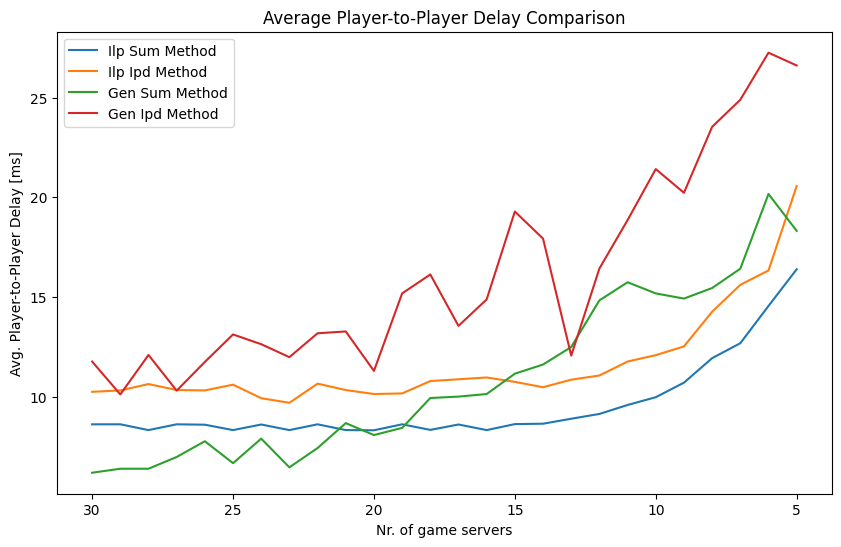

In [35]:
draw_compare_plot(*active_models, df=df_results, x='nr_of_servers', x_label='Nr. of game servers',
                  plot_type='average_player_to_player_delay_', y_label='Avg. Player-to-Player Delay [ms]',
                  title='Average Player-to-Player Delay Comparison')

In [ ]:
from network_graph import *
from visualization import *

network = NetworkGraph()
topology_dir = 'saves/20240505132437/germany_gen_sum_100/germany_gen_sum_100_30_4_32.gml'
network.load_topology(topology_dir)

#draw_graph_from_gml(topology_dir, 'test', node_size=300, edge_width_factor=2.0, figsize=(12, 8))

#ilp_sum ilp_ipd gen_sum gen_ipd
method_type='gen_sum'

network.calculate_player_server_connections_from_gml()

network.calculate_delays(method_type=method_type, debug_prints=False)

plt.figure(figsize=(10, 6))
# Define node positions using Latitude and Longitude attributes
positions = {node: (float(network.graph.nodes[node]['Longitude']), float(network.graph.nodes[node]['Latitude'])) 
            for node in network.graph.nodes() if 'Latitude' in network.graph.nodes[node] and 'Longitude' in network.graph.nodes[node]}

# Draw the nodes and edges of the network graph
nx.draw(network.graph, positions, with_labels=True, node_color='lightblue', node_size=500, font_weight='bold')

def update_paths(frame):
    plt.clf()  # Clear the plot for each frame
    nx.draw(network.graph, positions, with_labels=True, node_color='lightblue', node_size=500, font_weight='bold')
    
    # Generate a unique color for each path
    unique_color = '#{0:06x}'.format(random.randint(0, 0xFFFFFF))

    # Draw paths for the current frame/player with the unique color
    path = network.player_server_paths[frame]
    edges = [(path[j], path[j + 1]) for j in range(len(path) - 1)]
    
    # Use the same color for all edges in the path
    nx.draw_networkx_edges(self.network_graph.graph, positions, edgelist=edges, edge_color=unique_color, width=4.0)

    plt.title("Paths from Players to Servers (Frame: {})".format(frame + 1))

num_frames = len(network.player_server_paths)

# Create an animation
anim = FuncAnimation(plt.gcf(), update_paths, frames=num_frames, interval=1000, repeat=True)

plt.show()